# Flickbike plan van aanpak en data analyse

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import sys
sys.path.append("../")
import KNMIRequest as KR
import HolidayRequest as HR

import warnings
warnings.filterwarnings('ignore')

## Importing the data
Allereerst wordt de data ingeladen.  
Fiets data:

In [2]:
df = pd.read_csv('../input/bikes.csv', index_col=0, parse_dates=True)
df.head()

,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


Weerdata:

In [3]:
df_KNMI = KR.get_KNMI_HH(start=2019010100, end=2019120923)
df_KNMI.head()

,Station,Date,Hour,T,R,O,S,VV,RH
0,240,2019-01-01,1,85,0,0,0,69,0
1,240,2019-01-01,2,86,0,0,0,75,0
2,240,2019-01-01,3,85,0,0,0,75,0
3,240,2019-01-01,4,82,0,0,0,70,0
4,240,2019-01-01,5,87,1,0,0,70,-1


In [4]:
df_KNMI["Hour"].value_counts()

23    343
15    343
16    343
24    343
1     343
9     343
17    343
2     343
10    343
18    343
3     343
11    343
19    343
4     343
12    343
20    343
5     343
13    343
21    343
6     343
14    343
22    343
7     343
8     343
Name: Hour, dtype: int64

In [5]:
KR.data_dictionary

{'DD': 'Windrichting (in graden) gemiddeld over de laatste 10 minuten van het afgelopen uur (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil 990=veranderlijk. Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken',
 '    FH': 'Uurgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken',
 '    FF': 'Windsnelheid (in 0.1 m/s) gemiddeld over de laatste 10 minuten van het afgelopen uur',
 '    FX': 'Hoogste windstoot (in 0.1 m/s) over het afgelopen uurvak',
 '    T': 'Temperatuur (in 0.1 graden Celsius) op 1.50 m hoogte tijdens de waarneming',
 '    T10N': 'Minimumtemperatuur (in 0.1 graden Celsius) op 10 cm hoogte in de afgelopen 6 uur',
 '    TD': 'Dauwpuntstemperatuur (in 0.1 graden Celsius) op 1.50 m hoogte tijdens de waarneming',
 '    SQ': 'Duur van de zonneschijn (in 0.1 uren) per uurvak, berekend uit globale straling (-1 for <0.05 uur)',
 '    Q': 'Globale straling (

Vakantiedata:

In [6]:
ser_holidays = HR.get_holiday_range()
ser_holidays.head()

2019-10-19 22:00:00+00:00    2019-10-19
2019-10-20 22:00:00+00:00    2019-10-20
2019-10-21 22:00:00+00:00    2019-10-21
2019-10-22 22:00:00+00:00    2019-10-22
2019-10-23 22:00:00+00:00    2019-10-23
dtype: object

Data over de feestdagen:

**source:**
- https://kalender-nederland.nl/feestdagen-2019/

In [7]:
df_nat_hol = pd.read_csv('../input/Nationale Feestdagen.csv')

Het omzetten van de datum naar een `pd.datetime`.

In [8]:
df_nat_hol['date'] = pd.to_datetime(df_nat_hol['Datum'])
df_nat_hol.head()

,Feestdag,Datum,date
0,Nieuwjaarsdag 2019,01 Jan 2019,2019-01-01
1,Bevrijdingsdag 2019,05 May 2019,2019-05-05
2,Hemelvaart 2019,30 May 2019,2019-05-30
3,Goede vrijdag 2019,19 Apr 2019,2019-04-19
4,1e Paasdag 2019,21 Apr 2019,2019-04-21


## Analysing the data

In [9]:
df.dtypes

tripid          int64
userid          int64
bikeid          int64
account        object
bikenumber      int64
start_time     object
end_time       object
start_lat     float64
start_lng     float64
end_lat       float64
end_lng       float64
date           object
dtype: object

Omzetten naar correcte datatypes

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['date'] = pd.to_datetime(df['date'])

# extracting extra features
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

df.dtypes

tripid                 int64
userid                 int64
bikeid                 int64
account               object
bikenumber             int64
start_time    datetime64[ns]
end_time      datetime64[ns]
start_lat            float64
start_lng            float64
end_lat              float64
end_lng              float64
date          datetime64[ns]
weekday               object
hour                   int64
dtype: object

Checken of er geen missende data in de dataframe zit.

In [11]:
df.isna().sum()

tripid        0
userid        0
bikeid        0
account       0
bikenumber    0
start_time    0
end_time      0
start_lat     0
start_lng     0
end_lat       0
end_lng       0
date          0
weekday       0
hour          0
dtype: int64

## Verdiepingsopdracht

### Vraag 1
**Produceer een plot van verhuur-per-dag voor deze dataset.**  
  
Om dit voor elkaar te krijgen worden eerst alle dagen bij elkaar gegroupeerd zodat de hoeveelheid verhuren per dag opgeteld zullen worden.  
Hierna wordt deze dataset geplot.

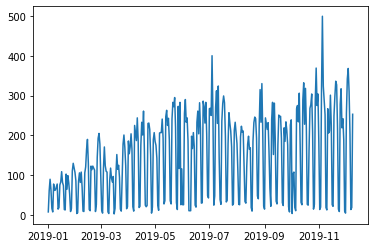

<Figure size 1296x1296 with 0 Axes>

In [12]:
df_dates_count = df.groupby(df['date'].dt.date)['tripid'].count()

x = df_dates_count.index
y = df_dates_count.values

# sns.set_style("darkgrid")
plt.plot(x, y)

plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.figure(figsize=(18,18))
plt.show()

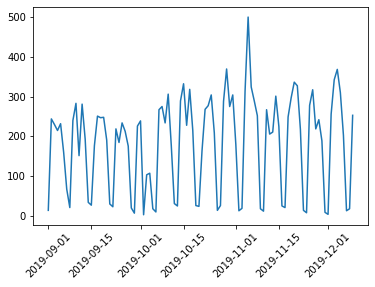

<Figure size 1296x1296 with 0 Axes>

In [13]:
df_dates_count.index = pd.to_datetime(df_dates_count.index)
df_three_months = df_dates_count.loc["2019-09-01":"2019-12-31"]

# sns.set_style("darkgrid")
plt.plot(df_three_months.index, df_three_months.values)

plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.xticks(rotation=45)
plt.figure(figsize=(18,18))
plt.show()

### Vraag 2
**Wat is de periodiciteit van deze dataset?**  
  
Om de vraag wat betreft periodiciteit te beantwoorden zullen we moeten gaan kijken of de data zich volgens een bepaald patroon gedraagt. Om deze vraag te beantwoorden bouwen we eerst een autocorrelatie plot.


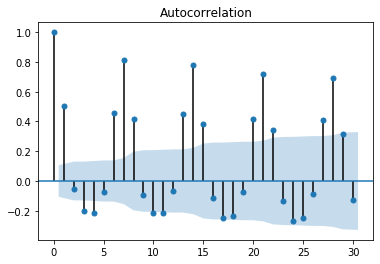

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_dates_count.values, lags=30)
plt.show()

# Opleveropdracht


### 1. Hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020?

Voordat een model gebouwd wordt, moet er data verzameld worden. Op dit moment is de data over alle verhuurde fietsen in de regio Schiphol-Oost in de tijdsperiode vanaf 1 januari 2019 tot 9 december 2019 beschikbaar gesteld. 

In de data staan gegevens van id’s van gebruikers, fietsen en trips. Verder bevat de data ook informatie over datum en tijd van gebruik, en de coördinaten van de startpunten en eindpunten van iedere trip.  
  
Allereerst zal de data verrijkt worden met weerdata, hierdoor zal het model gevoeliger worden voor weersituaties zoals sneeuw, mist en regen. Ten tweede wordt de data verrijkt feestdagen en schoolvakanties.

Wat betreft model kwamen we initiëel  uit op een decision tree regressie model. De keuze hiervoor is voornamelijk gemaakt op het feit dat decision trees redelijk inzichtelijk zijn (de decision tree kan makkelijk gevisualiseerd worden). Ook zal dit model zelf keuzes maken over welke features belangrijker zijn dan andere.
Uiteindelijk zal uit dit model een voorspelling komen die aangeeft hoeveel fietsen verhuurd worden op een bepaalde dag met bepaalde omstandigheden. Dit model zal echter wel op continue waardes getraind worden waarbij de uiteindelijke voorspelling ook een continue waarde zal zijn, om deze reden hebben we dan ook gekozen voor een decision tree regressie model.

Tijdens het onderzoeken van de data en eventuele methodes om over deze data voorspellingen te maken kwamen we ook nog op andere modellen uit. Eén daarvan is Long Short-Term Memory (LSTM). LSTM’s zijn zeer goed in het onthouden van lange termijn ‘herinneringen’. Verder werken LSTM’s goed met voorspellingen met tijdreeksen (timeseries) en leren ze welke data belangrijk is en welke niet.

Als laatste model vonden we Holt-Winters’ seasonal method. Deze methode wordt gebruikt om periodiciteit te gebruiken om voorspellingen op te maken. De data moet hiervoor ‘periodisch’ zijn. Aangezien bij het gebruik van fietsen ook andere factoren belangrijk kunnen zijn zou dit model met een ander model gecombineerd kunnen worden, met als eindresultaat een soort “hybride” model.
  
**Sources:**
- https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/
- https://eng.uber.com/forecasting-introduction/


In [15]:
df.head()

,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date,weekday,hour
1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00,Tuesday,6
2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35,Tuesday,6
3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32,Tuesday,14
4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46,Tuesday,14
5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01,Tuesday,20


### 2. Welke invloeden verwacht je van, en op welke manier kun je je model gevoelig maken voor factoren?
Om het model gevoeliger te maken voor factoren moet eerst besloten worden welke factoren invloed kunnen hebben over de uiteindelijke uitkomst van de voorspelling. Een aantal mogelijke factoren zijn al gegeven:
1. Het weer.
2. De dag van de week.
3. Bijzondere dagen in het jaar, zoals feestdagen, schoolvakanties, etc.
4. Eventueel andere factoren.

Per bovenstaande factor zullen we nu de mogelijke invloed beschrijven:
#### Het weer

* Regen	         
    * Iemand die gewoonlijk loopt fietst nu
    * Iemand die gewoonlijk fietst neemt shuttle/taxi
* Zonneschijn 	 
    * Iemand die gewoonlijk fietst, kan gaan lopen
    * Meer mensen fietsen
* Onweer
    * Mensen lopen eerder, zodat ze niet te groot zijn (minder kans op inslag)
* Mistigheid
    * Mensen fietsen wellicht minder bij weinig zicht 

In [16]:
df_KNMI.head()

,Station,Date,Hour,T,R,O,S,VV,RH
0,240,2019-01-01,1,85,0,0,0,69,0
1,240,2019-01-01,2,86,0,0,0,75,0
2,240,2019-01-01,3,85,0,0,0,75,0
3,240,2019-01-01,4,82,0,0,0,70,0
4,240,2019-01-01,5,87,1,0,0,70,-1


In [17]:
df_KNMI.describe()

,Hour,T,R,O,S,VV,RH
count,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000
mean,12.500000,116.491861,0.225705,0.009475,0.004130,67.019679,0.896137
std,6.922607,63.412002,0.418071,0.096884,0.064138,13.044678,5.312517
min,1.000000,-68.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6.750000,70.750000,0.000000,0.000000,0.000000,63.000000,0.000000
50%,12.500000,112.000000,0.000000,0.000000,0.000000,70.000000,0.000000
75%,18.250000,162.000000,0.000000,0.000000,0.000000,75.000000,0.000000
max,24.000000,361.000000,1.000000,1.000000,1.000000,83.000000,161.000000


##### Gevoeligheid model
Het model valt gevoelig te maken voor weer door een aantal weersverschijnselen direct als variabelen mee te nemen. De volgende data komt direct van het KNMI, en gaat over de gegeven tijdspanne. Zie `KR.data_dictionary` voor uitleg van ieder mogelijk variabele gegeven door KNMI. 

#### De dag van de week
* Vrijdag 	
  * Vaak gebruikt als thuiswerkdagen 		
* Zaterdag/zondag 	
   * Weekend, geen werk, zwaar verminderd gebruik. 

In [18]:
df_weekday = df_dates_count.copy(deep=True)
df_weekday.index = df_weekday.index.day_name()

df_weekday.groupby(df_weekday.index).mean()

date
Friday       158.265306
Monday       191.959184
Saturday      22.367347
Sunday        20.229167
Thursday     215.448980
Tuesday      220.673469
Wednesday    199.571429
Name: tripid, dtype: float64

In [19]:
df_weekday

date
Tuesday        8
Wednesday     61
Thursday      90
Friday        64
Saturday      17
            ... 
Thursday     310
Friday       203
Saturday      14
Sunday        19
Monday       253
Name: tripid, Length: 342, dtype: int64

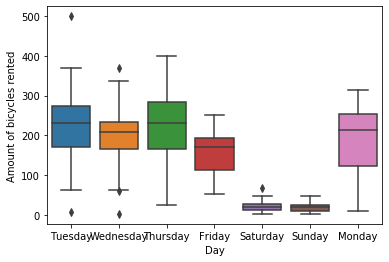

In [20]:
sns.boxplot(x=df_weekday.index, y=df_weekday.values)
plt.xlabel('Day')
plt.ylabel('Amount of bicycles rented')
plt.title('')
plt.show()

##### Gevoeligheid model
Uit de boxplots hierboven blijkt dat vrijdag, zaterdag en zondag inderdaad verminderd gebruik van Flickbikes ziet. Of dit te wijten valt aan de eerder gegeven redeneringen, is onbekend. 

Het model valt gevoelig te maken voor deze variabelen door twee boolean variabelen aan te maken; is een dag een vrijdag, en valt een dag in het weekend. 

In [21]:
df['Friday'] = (df['weekday'] == 'Friday')
df['Weekend'] = (df['weekday'] == 'Saturday') | (df['weekday'] == 'Sunday')
df[['Friday', 'Weekend']].describe()

,Friday,Weekend
count,50377,50377
unique,2,2
top,False,False
freq,42622,48310


#### Bijzondere dagen in het jaar
* Feestdagen 		
  * ‘verplicht’ vrij, geen werk
* Schoolvakanties 
    * Minder fietsen benodigd, x percentage werkende mensen met vakantie.  

Allereerst zal gekeken worden in hoeverre een school vakantie invloed zal hebben op het verhuur van fietsen.

In [22]:
df['School holiday'] = df['start_time'].dt.date.isin(ser_holidays)
df[['School holiday']].describe()

,School holiday
count,50377
unique,2
top,False
freq,40664


In [23]:
df_days = df.groupby([df["School holiday"], df["weekday"], df["date"].dt.date])[["tripid"]].count().reset_index()
df_holidays = df_days.groupby([df_days["weekday"], df_days["School holiday"]])[["tripid"]].mean()
df_holidays

tripid
weekday   School holiday            
Friday    False           156.550000
          True            149.300000
Monday    False           194.975000
          True            178.555556
Saturday  False            21.777778
          True             24.000000
Sunday    False            18.916667
          True             24.166667
Thursday  False           219.974359
          True            197.800000
Tuesday   False           225.974359
          True            200.000000
Wednesday False           198.615385
          True            203.300000

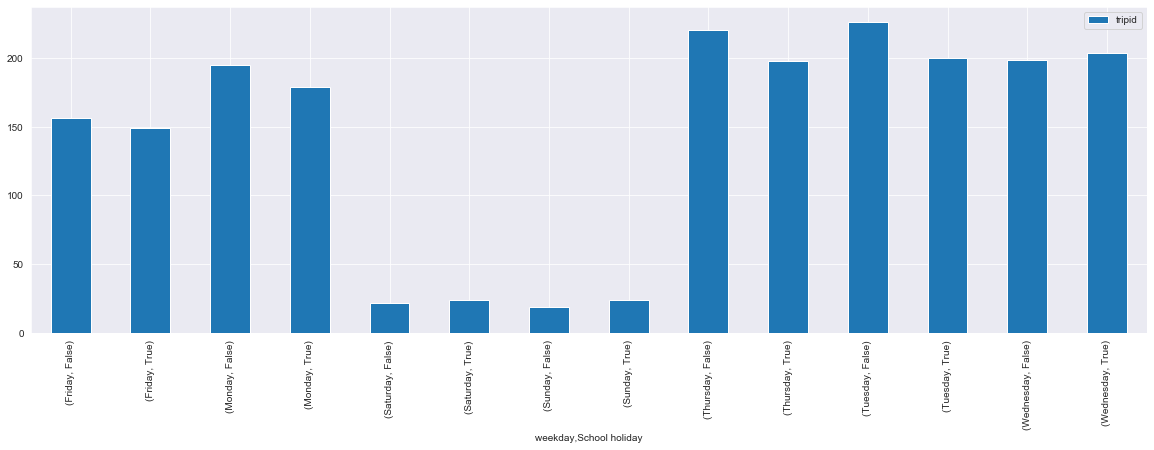

In [24]:
sns.set_style("darkgrid")
df_holidays.plot(kind="bar", figsize=(20, 6))

plt.title('')
plt.ylabel('')

plt.show()

Hierna zal gekeken worden in hoeverre nationale feestdagen invloed hebben op het verhuur van fietsen.

In [25]:
df['National holiday'] = df['start_time'].dt.date.isin(df_nat_hol['date'].dt.date)
df[['National holiday']].describe()

,National holiday
count,50377
unique,2
top,False
freq,50110


In [26]:
df_nat_hol_count = df[df['National holiday'] == True].groupby(df['start_time'].dt.date)[['tripid']].count()
df_nat_hol_count

,tripid
start_time,
2019-01-01,8
2019-04-19,160
2019-04-21,21
2019-04-22,24
2019-04-27,5
2019-05-05,12
2019-05-30,26
2019-06-10,11


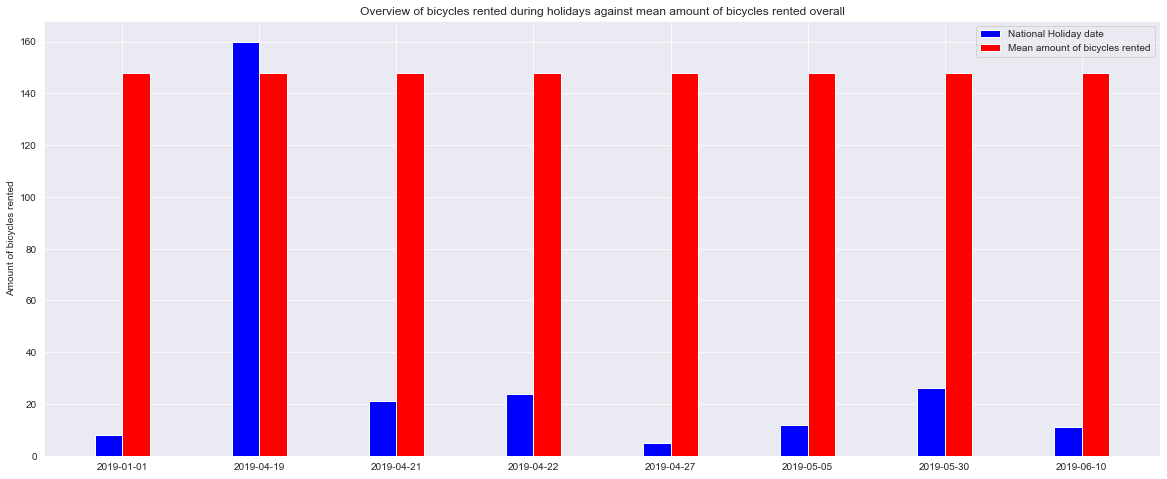

In [27]:
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")

total_mean = df.groupby(df['start_time'].dt.date)['tripid'].count().mean()
mean_list = np.full(len(df_nat_hol_count), total_mean)

x_pos = np.arange(len(df_nat_hol_count))

plt.bar(x_pos-0.1, df_nat_hol_count['tripid'], width=0.2, color='b', align='center', label='National Holiday date')
plt.bar(x_pos+0.1, mean_list, width=0.2, color='r', align='center', label='Mean amount of bicycles rented')

plt.xticks(x_pos, df_nat_hol_count.index)

plt.title('Overview of bicycles rented during holidays against mean amount of bicycles rented overall')
plt.ylabel('Amount of bicycles rented')

plt.legend()
plt.show()

In de grafiek hierboven valt te zien dat er op nationale feestdagen veel minder fietsen verhuurd worden dan normaal. Een uitschieter is 19 april. Dit is goede vrijdag en is officieel niet een feestdag waarop mensen vrij moeten krijgen.  
  
**source**:
- https://www.rijksoverheid.nl/onderwerpen/arbeidsovereenkomst-en-cao/vraag-en-antwoord/goede-vrijdag-vrije-dag

##### Gevoeligheid model
Hier moet eerst data over verzameld worden, deze data is te vinden op de websites van de (rijks)overheid. 

Ook valt het model voor deze variabelen gevoelig te maken door middel van het aanmaken van boolean variabelen; is een dag een feestdag, en valt een dag in een schoolvakantie.

### Eventuele andere factoren
Bij eventuele andere factoren kan gedacht worden aan factoren die, tot nu toe, nog niet benoemd zijn maar misschien wel een invloed kunnen hebben op de uitslag van de voorspelling. Bij dit soort factoren kan gedacht worden aan:

#### Uur van de dag
* Woensdag	
  * Kinderen eerder uit, eerder weg
* Vrijdag 		
  * Eerder vrij of vrijmibo, eerder/later weg
* Spitstijd	
  * Meer fietsen benodigd in de spits dan erbuiten.
* Lunchpauze 
  * Mensen pakken de fiets om elders hun lunchpauze te houden.

Om erachter te komen in hoeverre deze factoren een rol spelen zullen plots gemaakt worden die ofwel kunnen helpen om in het bewijs dat deze factoren een rol zullen spelen in de uiteindelijke voorspelling of kunnen helpen in het bewijs dat deze factoren geen rol zullen spelen in de uiteindelijke voorspelling.  

Allereerst worden voor alle dinsdagen, woensdagen en vrijdagen per uur de gemiddelde hoeveelheid verhuurde fietsen geplot. De dinsdag is er extra bij gekozen zodat het als base case kan dienen om de aannames voor woensdag en vrijdag te testen.

In [28]:
df_tuesday = df[df['weekday'] == 'Tuesday'].groupby([df['date'].dt.date, df['start_time'].dt.hour])['tripid'].count().to_frame().reset_index()
df_wednesday = df[df['weekday'] == 'Wednesday'].groupby([df['date'].dt.date, df['start_time'].dt.hour])['tripid'].count().to_frame().reset_index()
df_friday = df[df['weekday'] == 'Friday'].groupby([df['date'].dt.date, df['start_time'].dt.hour])['tripid'].count().to_frame().reset_index()

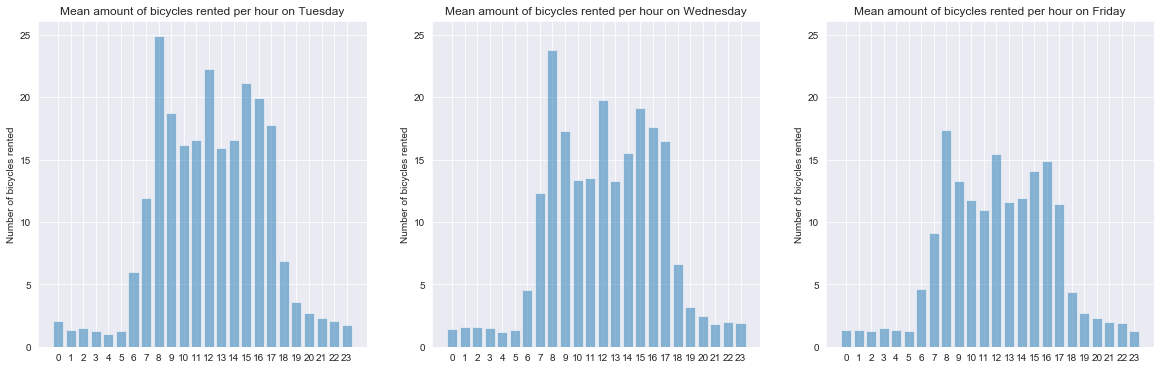

In [29]:
plt.figure(figsize=(20, 6))
sns.set_style("darkgrid")

y_pos = np.arange(24)


ax1 = plt.subplot(131)
ax1.bar(y_pos, df_tuesday.groupby(df_tuesday['start_time']).mean()['tripid'], align='center', alpha=0.5)

ax1.set_xticks(y_pos)
ax1.set_ylabel('Number of bicycles rented')
ax1.set_title('Mean amount of bicycles rented per hour on Tuesday')


ax2 = plt.subplot(132, sharey=ax1)
ax2.bar(y_pos, df_wednesday.groupby(df_wednesday['start_time']).mean()['tripid'], align='center', alpha=0.5)

ax2.set_xticks(y_pos)
ax2.set_ylabel('Number of bicycles rented')
ax2.set_title('Mean amount of bicycles rented per hour on Wednesday')


ax3 = plt.subplot(133, sharey=ax1)
ax3.bar(y_pos, df_friday.groupby(df_friday['start_time']).mean()['tripid'], align='center', alpha=0.5)

ax3.set_xticks(y_pos)
ax3.set_ylabel('Number of bicycles rented')
ax3.set_title('Mean amount of bicycles rented per hour on Friday')

plt.show()

Aangezien een groter plaatje ook handig is worden voor woensdag en vrijdag nu ook de boxplotten geplot. Dit geeft een overzicht van het bereik per uur weer.

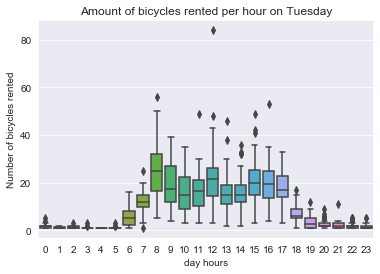

In [30]:
sns.boxplot(x=df_tuesday['start_time'], y=df_tuesday['tripid'])
plt.xlabel('day hours')
plt.ylabel('Number of bicycles rented')
plt.title('Amount of bicycles rented per hour on Tuesday')
plt.show()

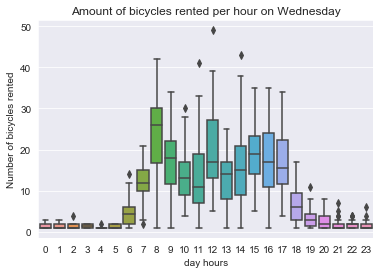

In [31]:
sns.boxplot(x=df_wednesday['start_time'], y=df_wednesday['tripid'])
plt.xlabel('day hours')
plt.ylabel('Number of bicycles rented')
plt.title('Amount of bicycles rented per hour on Wednesday')
plt.show()

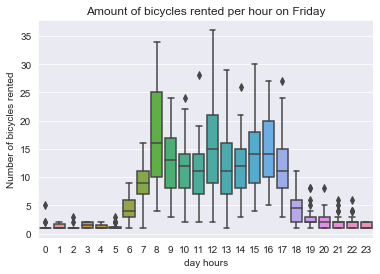

In [32]:
sns.boxplot(x=df_friday['start_time'], y=df_friday['tripid'])
plt.xlabel('day hours')
plt.ylabel('Number of bicycles rented')
plt.title('Amount of bicycles rented per hour on Friday')
plt.show()

##### Gevoeligheid model

Zoals in de grafieken te zien is zijn er tijdens de spitstijd en lunchtijd (kleine) pieken te zien. Echter vallen er geen grote verschillen te zien tussen dinsdagen en de andere dagen wat betreft mensen die eerder weg gaan (dit kan alsnog het geval zijn, maar deze mensen hebben dan geen fiets gehuurd).  
Wat hier opnieuw opvalt is het feit dat er op vrijdag gemiddeld minder mensen een huurfiets lijken te pakken.  
  
Om het model gevoelig te maken voor deze groei kunnen de uren als variabelen meegegeven worden. Het model zal dan als het goed is zelf erachter komen dat sommige uren als spits of lunchijd gelden en andere uren niet. Echter zijn deze factoren voornamelijk van toepassing wanneer voorspeld moet worden waar er tekorten of overschotten zijn. Wanneer de 'groei' berekend moet worden, dus over een gehele dag, zullen deze factoren overbodig zijn.

#### Dagen sinds eerst meetmoment
Het aantal Flickbike fietsen dat gehuurd wordt neemt met de dag toe, dit zal ook een effect hebben op het aantal gehuurde fietsen op de te voorspellen dagen. 

##### Gevoeligheid model
Om het model gevoelig te maken voor deze groei, kan er een “dagen sinds meetmoment” variabel meegenomen worden. Het eerste meetpunt in de data zal dan dag `0`, het tweede meetpunt in de data zal dan dag `1` zijn, etc.

<!-- LSTM is al gevoellig hiervoor, deze is dan niet nodig. -->

In [36]:
df['Days from epoch'] = (df['start_time'] - df['start_time'].min()).dt.days
df[['date', 'Days from epoch']].sample(10)

,date,Days from epoch
9516,2019-04-16 08:43:43,105
14142,2019-05-16 11:52:25,135
16297,2019-05-29 07:31:45,148
28255,2019-08-07 13:26:19,218
37418,2019-10-04 16:58:15,276
1217,2019-01-22 11:10:13,21
4376,2019-02-27 13:53:04,57
34751,2019-09-17 08:43:57,259
4639,2019-03-01 08:06:48,59
39336,2019-10-15 15:21:19,287


In [34]:
df_days_from = df.groupby([df["Days from epoch"], df["date"].dt.date])[["tripid"]].count().reset_index()
df_days_from[["Days from epoch", "tripid"]].corr()

,Days from epoch,tripid
Days from epoch,1.000000,0.148735
tripid,0.148735,1.000000


Uit de bovenstaande correlatiematrix blijkt dat er een kleine correlatie bestaat tussen het aantal dagen sinds meetmoment en hoe vaak een fiets is gehuurd op een dag. Dit is echter gebaseerd op nog niet genormaliseerde data, en kan dus een enigsinds scheef beeld geven.

### 3. Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?

De bovenstaande vraag bestaat eigenlijk uit twee vragen die, hoewel ze aan elkaar gelinkt zijn, apart behandeld kunnen worden. De bovenstaande vraag wordt dus opgedeeld in twee deelvragen, en zullen apart beantwoord worden.

#### 3.1 Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan?

Om, op basis van data, te voorspellen waar tekorten van fietsen dreigen te ontstaan zullen verschillende stappen genomen moeten worden.

Allereerst zal een clustering toegepast worden (e.g. K-means) om de locaties te bepalen waar veel fietsen gehuurd worden. Hiermee worden de locaties gedefinieerd waar mogelijke tekorten zouden kunnen ontstaan. 

Met behulp van deze gevonden ‘hotspots’ zou per uur voorspeld kunnen worden wat de behoefte van fietsen op een bepaalde plek is. In deze voorspelling kunnen extra factoren meegenomen worden zoals: het weer, uur op de dag, de dag zelf en of het een feestdag is.

Hiervoor zal waarschijnlijk hetzelfde model gebruikt worden als degene die we bij vraag 1 gebruiken. Het enige verschil is dat dit model nu specifiek getraind zal worden op uren in plaats van dagen.
 

#### 3.2 Hoe kunnen de fietsen het beste zo worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?

<!-- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/ -->

Met dezelfde methode zou ook bepaald kunnen worden waar veel fietsen hun route beëindigen. Door middel van clustering kan dus ook worden gedefinieerd waar mogelijke overschotten kunnen ontstaan. Deze fietsen zouden dan verplaatst kunnen worden naar ‘drukke’ plaatsen.  
  


### 4. Hoe kun je berekenen met hoeveel fietsen zou FlickBike minimaal kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?

Ervan uitgaand dat dit over de pieken over de gehele periode gaat, kan het model uit vraag 3 gebruikt worden om per uur het verhuurde aantal fietsen te voorspellen. De grootste piek hiervan kan vervolgens berekend worden.

### 5. Hoe ga je de antwoorden op vragen (1)-(4) visualiseren?

Om deze vraag te beantwoorden zal per bovenstaande vraag een antwoord gegeven worden.

#### 1. Hoe bereken je  de groei van FlickBike? In het bijzonder: hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020?

Om de hoeveelheid verhuurde fietsen per dag te berekenen zullen we modellen trainen die uiteindelijk voorspellingen kunnen geven. Om deze voorspellingen te testen is de dataset opgesplitst in een training- en testset. Met de trainingset zullen we de modellen trainen om daarna met de testset de voorspellingen te testen. Hier komt uiteindelijk een RMSE uit. Om deze resultaten te visualiseren zullen we de échte waardes tegenover de voorspelde waardes plotten in een grafiek.

#### 2.Welke invloeden verwacht je van, en op welke manier kun je je model gevoelig maken voor factoren?

Om destijds deze vraag te beantwoorden zijn er over verschillende features die mogelijk invloed kunnen hebben op het model nagedacht. Ook is er beschreven hoe het model gevoelig gemaakt kan worden voor deze features.

Wat betreft visualisaties hebben we onder iedere feature en de daarbij behorende onderbouwing  voor zover mogelijk overzichten, grafieken en plots gemaakt die ofwel de invloed van de feature rechtvaardigt ofwel gebruikt kan worden om de invloed van de feature uit te sluiten.


#### 3. Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?

Zoals ook al in de beschrijving van de methode staat gaan we allereerst op zoek naar bepaalde hotspots waar ofwel veel fietsen verhuurd worden ofwel veel fietsen gedropt worden. Om dit proces te visualiseren kunnen we een heatmap bouwen zodat al deze punten, als het goed is, naar voren komen om hierna de voorspelde punten eroverheen te plotten.

Om de uiteindelijke voorspellingen te visualiseren kunnen we opnieuw de voorspelde waardes tegenover de echte waardes plotten om zo het verschil tussen de twee waarden weer te geven.


#### 4. Hoe kun je berekenen met hoeveel fietsen zou FlickBike minimaal kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?

Wanneer alle voorspellingen gedaan en geplot zijn kan er door de hoogste pieken eruit te halen gekeken worden met hoeveel fietsen FlickBike minimaal zou moeten werken om alle verwachten pieken op te kunnen vangen. Wat betreft visualisaties kunnen hierbij alle voorspellingen geplot worden zodat de pieken visueel worden gemaakt.
